# Task- 4 Stock Market & News Headline Prediction using Numerical and Textual Analysis

# Submitted by - Aman gupta

**Loading YahooFinance Dataset**

Pandas web data reader is an extension of pandas library to communicate with most updated financial data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.877136
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,77.050926


This piece of code will pull 10 years data from January 2010 until January 2020. Feel free to tweak the start and end date as you see necessary. For the rest of analysis, we will use the Closing Price which remarks the final price in which the stocks are traded by the end of the day.

# Exploring Rolling Mean and Return Rate of Stocks
In this analysis, we analyse stocks using two key measurements: Rolling Mean and Return Rate.

**Rolling Mean (Moving Average) — to determine trend**

Rolling mean/Moving Average (MA) smooths out price data by creating a constantly updated average price. This is useful to cut down “noise” in our price chart. Furthermore, this Moving Average could act as “Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

In [4]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head(20)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
Name: Adj Close, dtype: float64

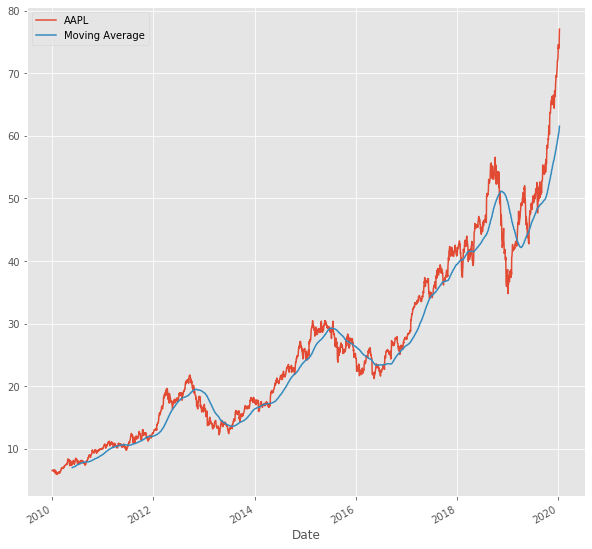

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='Moving Average')
plt.legend()
plt.show()

# Return Deviation — to determine risk and return

Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.

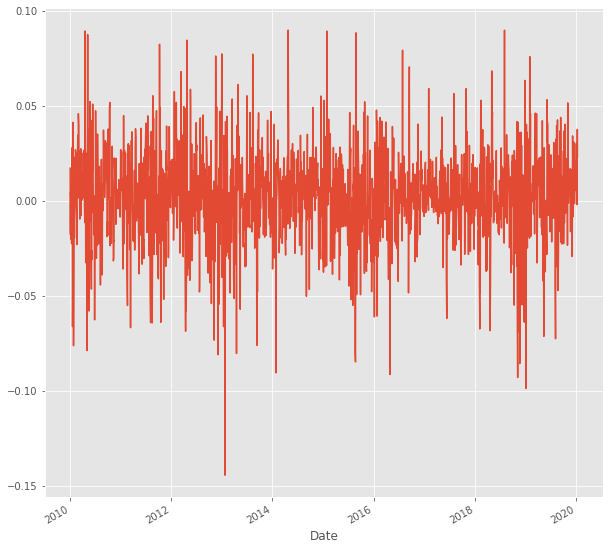

In [6]:
rets = close_px / close_px.shift(2) - 1
rets.plot(label='return')
plt.show()

Logically, our ideal stocks should return as high and stable as possible. If you are risk averse(like me), you might want to avoid this stocks as you saw the 10% drop in 2013. This decision is heavily subjected to your general sentiment of the stocks and competitor analysis.

# Analysing your Competitors Stocks

In this segment, we are going to analyse on how one company performs in relative with its competitor. Let’s assume we are interested in technology companies and want to compare the big guns: Apple, GE, Google, IBM, and Microsoft.

In [7]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()


Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.503574,10.493408,308.832428,92.406113,23.801456
2010-01-04,6.604801,10.715343,312.204773,93.500313,24.168472
2010-01-05,6.616219,10.770829,310.829926,92.370834,24.176279
2010-01-06,6.510980,10.715343,302.994293,91.770790,24.027906
2010-01-07,6.498945,11.270185,295.940735,91.453102,23.778025


# Correlation Analysis — Does one competitor affect others?

We can analyse the competition by running the percentage change and correlation function in pandas. Percentage change will find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

In [8]:

retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001848,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008821,0.009638,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006607
2010-01-13,0.014105,0.003578,-0.005741,-0.002145,0.009312


To prove the positive correlations, we will use heat maps to visualize the correlation ranges among the competing stocks. Notice that the lighter the color, the more correlated the two stocks are.

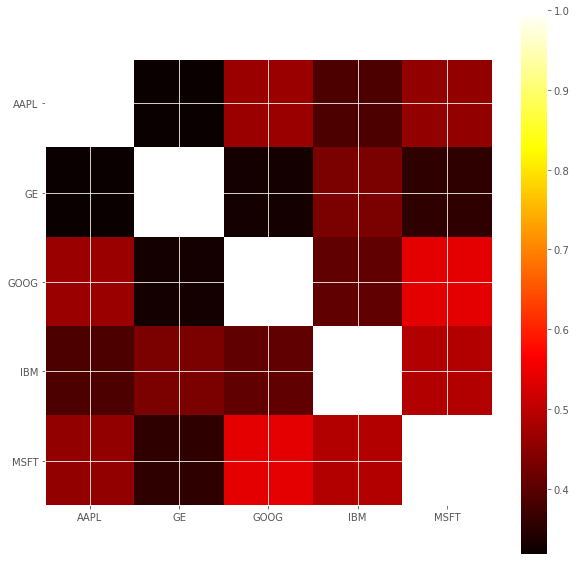

In [9]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

From the Scatter Matrix and Heatmap, we can find great correlations among the competing stocks. However, this might not show causality, and could just show the trend in the technology industry rather than show how competing stocks affect each other.

# Stocks Returns Rate and Risk

Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

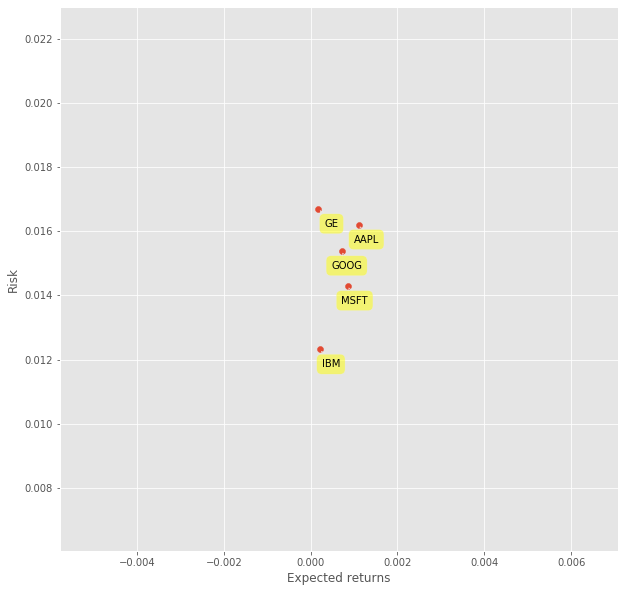

In [10]:

plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


# India-News-Headlines file imported and doing Numerical Anaylsis.

In [11]:
df1 = pd.read_csv('india-news-headlines.csv')
df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [12]:
df1.tail(10)

,publish_date,headline_category,headline_text
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...
3297163,20200630,entertainment.hindi.bollywood,sushant singh rajputs demise fans trend cbifor...
3297164,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,home.education,icse isc result 2020 when where to check class...
3297166,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [14]:

df1.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [15]:

df1.max()

publish_date                                                  20200630
headline_category                                          young-turks
headline_text        ~!The 7 Plexus Knots story in a Galaxy called ...
dtype: object

In [16]:
df1.min()

publish_date                                20010101
headline_category                   2008-in-pictures
headline_text         15cr funds for two auditoriums
dtype: object

In [17]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [18]:
#In case of null values
df1.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [19]:
df1.corr()

,publish_date
publish_date,1.0


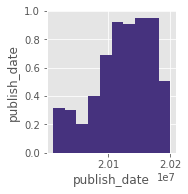

In [20]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [21]:
df1['headline_text'].value_counts()

Sunny Leone HOT photos                                  98
Watch top news in one-minute                            90
Official Site                                           89
Football: Italian Serie A table                         88
Football: Spanish La Liga table                         86
                                                        ..
Act against illegal T Nagar bldgs                        1
Weed removed; water visible in Kanjhli Wetland           1
College teachers to strike on Oct 30                     1
CM: Negativity spoils one's confidence                   1
Jodhpur; Kota & Jaipur in top 5 for random samplings     1
Name: headline_text, Length: 3082589, dtype: int64

In [22]:
df1['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
ballot-talk                     7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

# Now we can do EDA (Exploratry Data Analysis) using NLP & NLTK tools

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the news headline length.

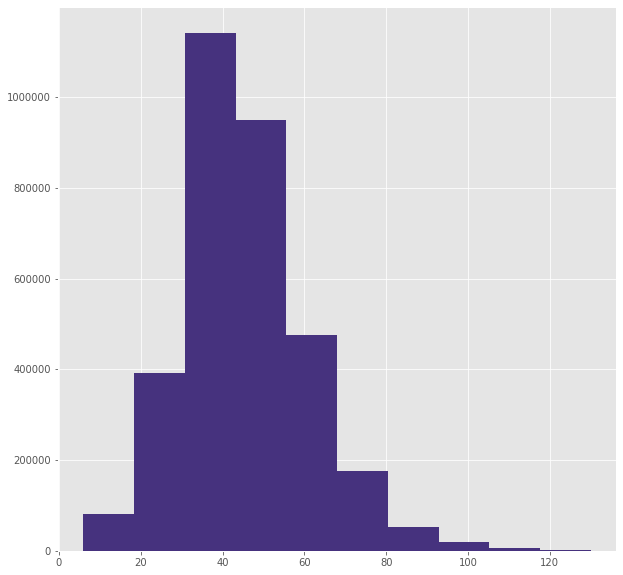

In [23]:
df1['headline_text'].str.len().hist()
plt.show()


The histogram shows that news headlines range from 10 to 70 characters and generally, it is between 25 to 55 characters. Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each news headline.

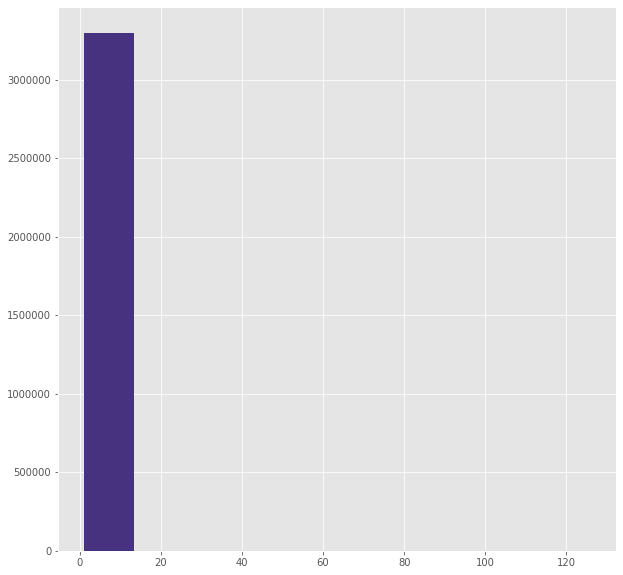

In [24]:

df1['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()


The average word length ranges between 1 to 18 with 10 being the most common length. Does it mean that people are using really short words in news headlines?

Let’s find out. One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data. To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now, we’ll create the corpus.

In [27]:

corpus=[]
new= df1['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

Now we know which stopwords occur frequently in our text, let’s inspect which words other than these stopwords occur frequently. We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.

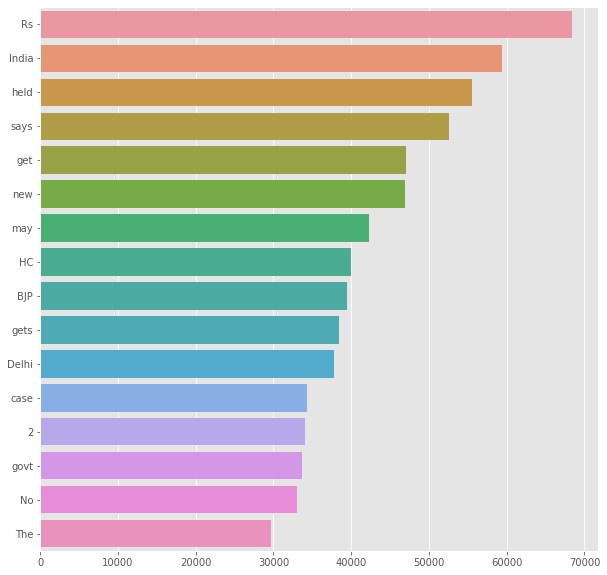

In [28]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

Wow! The “Rs”, “India” and “held” dominate the headlines over the last 15 year but when we observe other words in the graph they are all related to the RS — India.

# Ngram exploration

Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc. If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on. Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [29]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))


[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

To build a representation of our vocabulary we will use Countvectorizer. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. It is available in sklearn.feature_engineering.text So with all this, we will analyze the top bigrams in our news headlines.

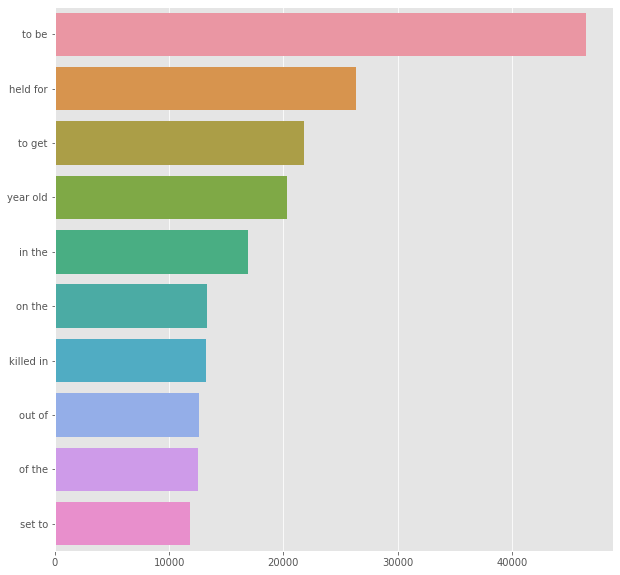

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

# Textblob

Textblob is a python library built on top of nltk. It has been around for some time and is very easy and convenient to use. The sentiment function of TextBlob returns two properties: polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1]. I will run this function on our news headlines.

In [33]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [34]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

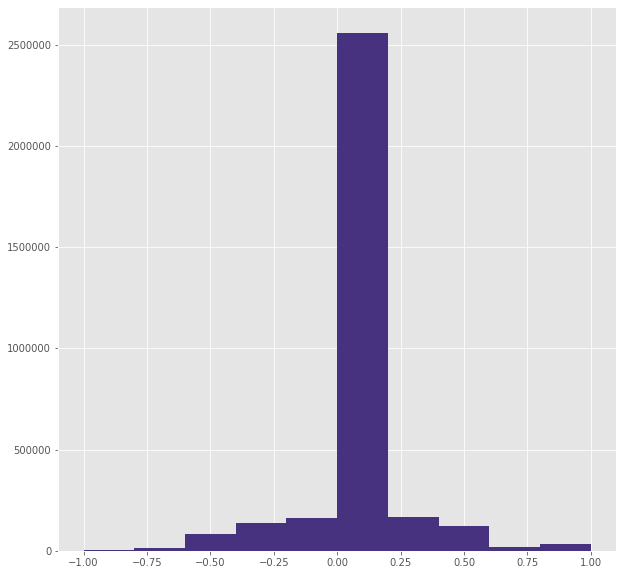

In [35]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score']=df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

You can see that the polarity mainly ranges between 0.00 and 0.20. This indicates that the majority of the news headlines are neutral. Let’s dig a bit deeper by classifying the news as negative, positive and neutral based on the scores.

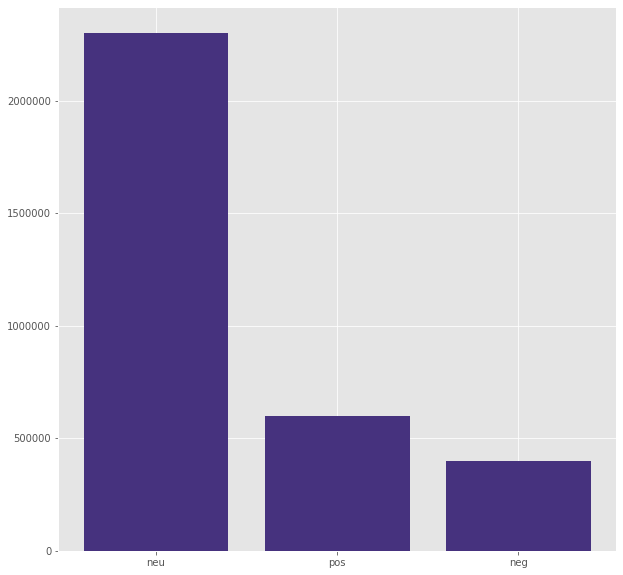

In [36]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df1['polarity']=df1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

Yep, 70 % of news is neutral with only 18% of positive and 11% of negative. Let’s take a look at some of the positive and negative headlines.

In [37]:
df1[df1['polarity']=='pos']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
31                 Extra buses to clear tourist traffic
39          Will Qureshi's return really help the govt?
Name: headline_text, dtype: object

In [38]:
df1[df1['polarity']=='neg']['headline_text'].head()

66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object

We discussed and implemented various exploratory data analysis methods for text data. Some common, some lesser-known but all of them could be a great addition to your data exploration toolkit.

# THANKYOU

# AMAN GUPTA